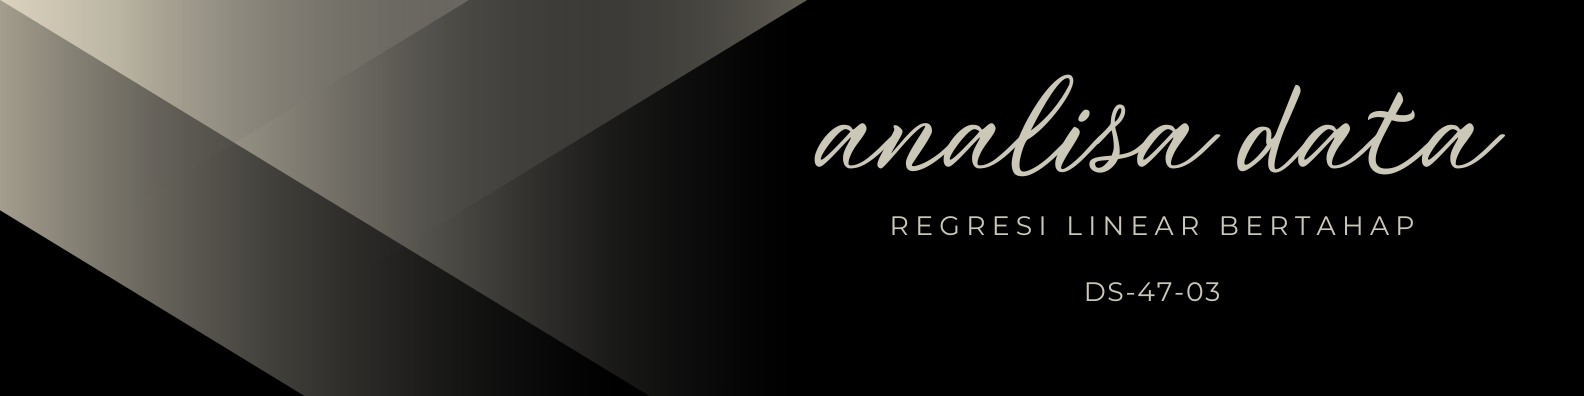

# <center>**Tugas Besar Analisa Data: Model Regresi Linear dengan Metode Regresi Bertahap pada Dataset Harga Minyak Bumi**<center>

---

<center><b>By:</b></center>
<p></p>

<center><b>Kevin Jonathan Rotty</center>

---

# **1. Import Library dan Eksplorasi Dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import Image
import seaborn as sns

In [6]:
df = pd.read_csv('/Users/vinsss/PortfolioProject/mulipleLinearRegression-fromScratch/data/Harga Minyak Bumi.csv')

In [7]:
df

,Produksi_Global_Juta_Barel_per_Hari,Konsumsi_Global_Juta_Barel_per_Hari,Cadangan_Minyak_Miliar_Barel,Indeks_Kekuatan_Ekonomi_Global,Harga_Minyak_per_Barel_USD
0,85.0,84.5,1500,100.0,70.0
1,85.2,84.8,1510,101.0,71.5
2,84.8,84.2,1490,99.0,68.5
3,85.5,85.0,1520,102.0,73.0
4,84.9,84.4,1495,99.5,69.0
...,...,...,...,...,...
95,86.1,85.7,1540,104.0,78.5
96,86.3,86.0,1550,104.5,80.0
97,85.9,85.5,1535,103.5,77.5
98,86.5,86.2,1560,105.0,81.5


In [8]:
print(df.isnull().sum())

Produksi_Global_Juta_Barel_per_Hari    0
Konsumsi_Global_Juta_Barel_per_Hari    0
Cadangan_Minyak_Miliar_Barel           0
Indeks_Kekuatan_Ekonomi_Global         0
Harga_Minyak_per_Barel_USD             0
dtype: int64


In [9]:
df.describe()

,Produksi_Global_Juta_Barel_per_Hari,Konsumsi_Global_Juta_Barel_per_Hari,Cadangan_Minyak_Miliar_Barel,Indeks_Kekuatan_Ekonomi_Global,Harga_Minyak_per_Barel_USD
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,89.270000,88.887000,1684.70000,118.985000,98.105000
std,3.599284,3.630863,156.31621,15.438286,22.869888
min,83.800000,83.200000,1440.00000,97.500000,63.500000
25%,85.975000,85.575000,1540.00000,104.000000,77.500000
50%,88.950000,88.600000,1672.50000,117.500000,95.750000
75%,92.425000,92.100000,1821.25000,132.250000,118.125000
max,95.900000,95.600000,1970.00000,147.000000,140.500000


# **2. Persiapan Dataset Sebelum Masuk dalam Pemodelan**

In [10]:
df_model = df.copy()
df_model

,Produksi_Global_Juta_Barel_per_Hari,Konsumsi_Global_Juta_Barel_per_Hari,Cadangan_Minyak_Miliar_Barel,Indeks_Kekuatan_Ekonomi_Global,Harga_Minyak_per_Barel_USD
0,85.0,84.5,1500,100.0,70.0
1,85.2,84.8,1510,101.0,71.5
2,84.8,84.2,1490,99.0,68.5
3,85.5,85.0,1520,102.0,73.0
4,84.9,84.4,1495,99.5,69.0
...,...,...,...,...,...
95,86.1,85.7,1540,104.0,78.5
96,86.3,86.0,1550,104.5,80.0
97,85.9,85.5,1535,103.5,77.5
98,86.5,86.2,1560,105.0,81.5


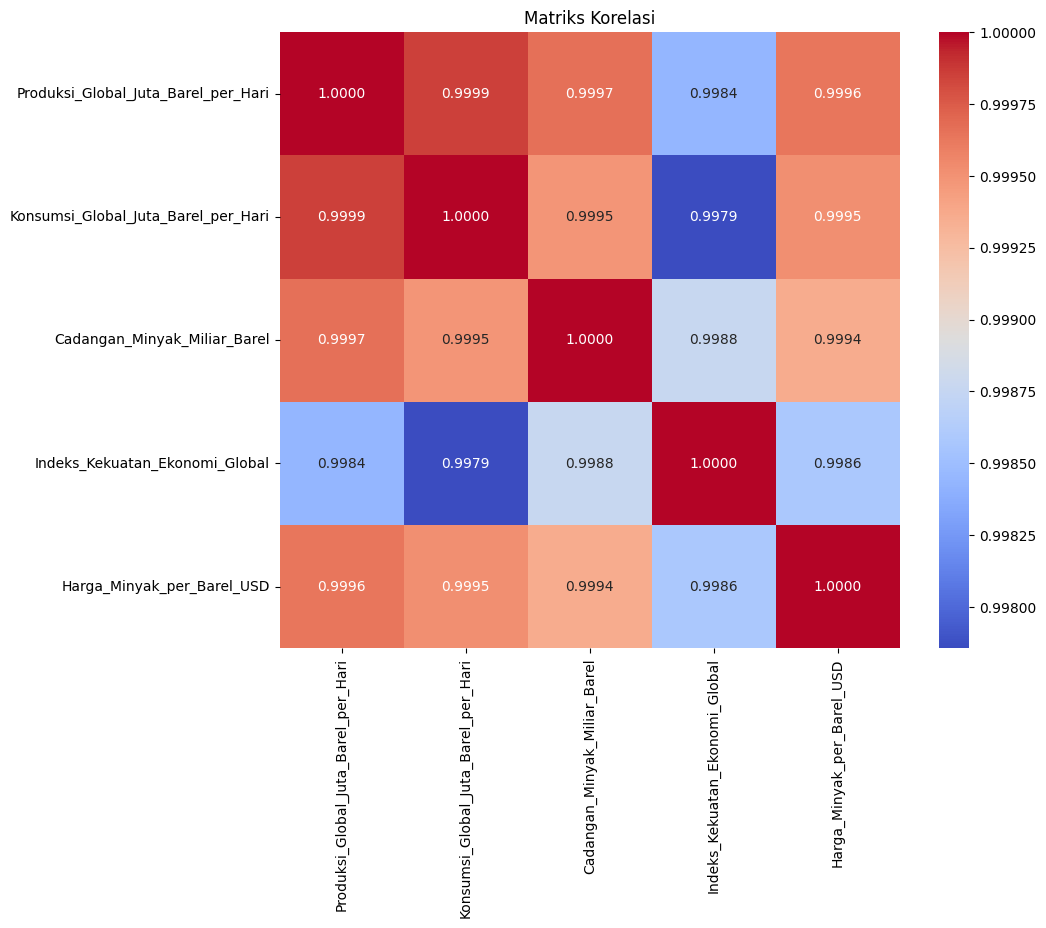

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap="coolwarm")
plt.title("Matriks Korelasi")
plt.show()

In [12]:
df_model = df_model.rename(columns={'Harga_Minyak_per_Barel_USD' : 'Y',
                                    'Produksi_Global_Juta_Barel_per_Hari' : 'X1',
                                    'Konsumsi_Global_Juta_Barel_per_Hari' : 'X2',
                                    'Cadangan_Minyak_Miliar_Barel' : 'X3',
                                    'Indeks_Kekuatan_Ekonomi_Global' : 'X4',
})
df_model

,X1,X2,X3,X4,Y
0,85.0,84.5,1500,100.0,70.0
1,85.2,84.8,1510,101.0,71.5
2,84.8,84.2,1490,99.0,68.5
3,85.5,85.0,1520,102.0,73.0
4,84.9,84.4,1495,99.5,69.0
...,...,...,...,...,...
95,86.1,85.7,1540,104.0,78.5
96,86.3,86.0,1550,104.5,80.0
97,85.9,85.5,1535,103.5,77.5
98,86.5,86.2,1560,105.0,81.5


# **3. Pemodelan dengan Regresi Linear Bertahap**

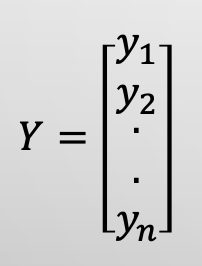

In [13]:
Y = np.array(df_model['Y']).reshape(-1, 1)
Y

array([[ 70. ],
       [ 71.5],
       [ 68.5],
       [ 73. ],
       [ 69. ],
       [ 74.5],
       [ 76. ],
       [ 73.5],
       [ 77.5],
       [ 75. ],
       [ 79. ],
       [ 80.5],
       [ 78. ],
       [ 82. ],
       [ 79.5],
       [ 83.5],
       [ 85. ],
       [ 82.5],
       [ 86.5],
       [ 84. ],
       [ 88. ],
       [ 89.5],
       [ 87. ],
       [ 91. ],
       [ 88.5],
       [ 92.5],
       [ 94. ],
       [ 91.5],
       [ 95.5],
       [ 93. ],
       [ 97. ],
       [ 98.5],
       [ 96. ],
       [100. ],
       [ 97.5],
       [101.5],
       [103. ],
       [100.5],
       [104.5],
       [102. ],
       [106. ],
       [107.5],
       [105. ],
       [109. ],
       [106.5],
       [110.5],
       [112. ],
       [109.5],
       [113.5],
       [111. ],
       [115. ],
       [116.5],
       [114. ],
       [118. ],
       [115.5],
       [119.5],
       [121. ],
       [118.5],
       [122.5],
       [120. ],
       [124. ],
       [125.5],
       [

## **3.1 Langkah Pertama: Membuat Persamaan Regresi Linear Sederhana Tiap Peubah Bebas Terhadap Y**

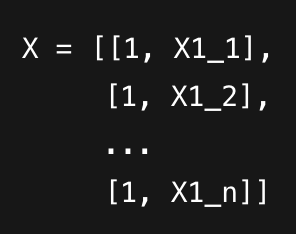

In [14]:
# Memilih peubah Jumlah Kuadrat Regresi terbesar (JKR)
# untuk menentukan peubah bebas yang akan dimasukkan ke dalam model
# Menghitung Jumlah Kuadrat Regresi (JKR) untuk setiap peubah bebas

R_langkah_pertama = []

for var in ['X1', 'X2', 'X3', 'X4']:
    X = np.array([[1, df_model[var][i]] for i in range (len(df_model))])
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    g = X.T.dot(Y)
    print(f"Peubah Bebas: {var}")
    print(f"Koefisien Regresi: {beta.flatten()}")

    sum_bj_bg = np.sum(beta*g)
    sum_Yi = np.sum(Y)
    n = len(Y)
    JKR = sum_bj_bg - ((sum_Yi**2)/n)

    R_langkah_pertama.append(JKR)

df_R_langkah_pertama = pd.DataFrame(R_langkah_pertama, index=['X1','X2', 'X3', 'X4'], columns=['R'])
print()
print(df_R_langkah_pertama)
print()
print(df_R_langkah_pertama[df_R_langkah_pertama['R'] == df_R_langkah_pertama['R'].max()])

Peubah Bebas: X1
Koefisien Regresi: [-468.91259534    6.35171497]
Peubah Bebas: X2
Koefisien Regresi: [-461.50156984    6.29570769]
Peubah Bebas: X3
Koefisien Regresi: [-1.48218584e+02  1.46212135e-01]
Peubah Bebas: X4
Koefisien Regresi: [-77.90571747   1.47926812]

               R
X1  51742.753347
X2  51730.171207
X3  51714.230704
X4  51632.977323

               R
X1  51742.753347


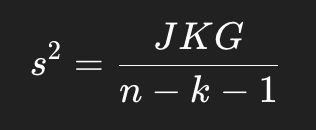

In [15]:
#Cari rataan kuadrat galat (s^2)

JKT = 0
JKR = 0

X = np.array([[1, df_model['X1'][i]] for i in range (len(df_model))])
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
g = X.T. dot(Y)
print(f"Peubah Bebas: X1")
print(f"Koefisien Regresi: {beta.flatten()}")

Y_mean = np.mean(Y)
JKT = np.sum((Y - Y_mean)**2)

sum_bj_gj = np.sum(beta*g)
sum_Yi = np. sum(Y)
n = len(Y)
JKR = sum_bj_gj - ((sum_Yi**2) / n)

JKG = JKT - JKR
s_squared_langkah_pertama = JKG/(len(Y) - 1 - 1)
print("s^2 : ", s_squared_langkah_pertama)

Peubah Bebas: X1
Koefisien Regresi: [-468.91259534    6.35171497]
s^2 :  0.3815729897948159


In [16]:
#Membandingkan dengan nilai f tabel dan f hitung

f_hitung = JKR/s_squared_langkah_pertama
print('f hitung: ', f_hitung)
f_tabel = stats.f.isf(0.05, 1, len(Y) - 1 - 1)

if f_hitung > f_tabel:
  print('X1 masuk ke dalam model, karena: ')
  print('f hitung(',f_hitung,') >', 'f tabel(',f_tabel, ')')
else:
  print('X1 tidak masuk ke dalam model, karena: ')
  print('f hitung(',f_hitung,') <', 'f tabel(',f_tabel,')')

f hitung:  135603.8156024195
X1 masuk ke dalam model, karena: 
f hitung( 135603.8156024195 ) > f tabel( 3.9381110780033644 )


## **3.2 Langkah Kedua: Mencocokkan tiga persamaan regresi yang mengandung X1, yaitu (X2,X1), (X3,X1), (X4,X1)**

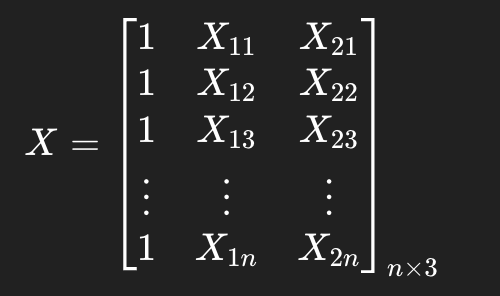

In [17]:
R_langkah_pertama

[np.float64(51742.75334700011),
 np.float64(51730.17120665405),
 np.float64(51714.23070420092),
 np.float64(51632.97732295748)]

In [18]:
#Pilih peubah yang bersinggung dengan X1
JKR = 0

R_langkah_kedua = []

for var in ['X2', 'X3', 'X4']:
  X = np.array([[1, df_model['X1'][i], df_model[var][i]] for i in range (len(df_model))])
  beta = beta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y)
  g = X.T.dot(Y)
  print(f"Peubah Bebas: {var}, X1")
  print(f"Koefisien Regresi: {beta.flatten()}")

  sum_bj_gj = np.sum(beta*g)
  sum_Yi = np.sum(Y)
  n = len(Y)
  JKR = sum_bj_gj - ((sum_Yi**2) / n)

  R_langkah_kedua.append(JKR)

df_R_langkah_kedua = pd.DataFrame(R_langkah_kedua, index=['X2, X1', 'X3, X1', 'X4, X1'], columns=['R'])
print()
print(df_R_langkah_kedua)
print()
print(df_R_langkah_kedua[df_R_langkah_kedua['R'] == df_R_langkah_kedua['R'].max()])

Peubah Bebas: X2, X1
Koefisien Regresi: [-468.26940814    5.78901554    0.557888  ]
Peubah Bebas: X3, X1
Koefisien Regresi: [-4.38685032e+02  5.75273994e+00  1.37964847e-02]
Peubah Bebas: X4, X1
Koefisien Regresi: [-4.06160349e+02  5.33112674e+00  2.38312942e-01]

                   R
X2, X1  51742.873106
X3, X1  51743.066128
X4, X1  51746.943175

                   R
X4, X1  51746.943175


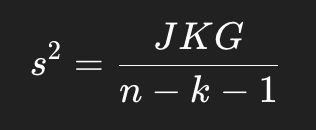

In [19]:
#Cari rataan kuadrat galat (s^2)
JKT = 0
JKR = 0

X = np.array([[1, df_model['X1'][i], df_model['X4'][i]] for i in range(len(df_model))])
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
g = X.T.dot(Y)

Y_mean = np.mean(Y)
JKT = np. sum((Y - Y_mean)**2)

sum_bj_gj = np.sum(beta*g)
sum_Yi = np.sum(Y)
n = len(Y)
JKR = sum_bj_gj - ((sum_Yi**2) / n)

JKG = JKT - JKR
s_squared_langkah_kedua = JKG/(len(Y) - 2 - 1)
print("s^2 : ",s_squared_langkah_kedua)

s^2 :  0.3423123697024325


In [20]:
#Membandingkan dengan nilai f
f_hitung = (JKR-R_langkah_pertama[0])/s_squared_langkah_kedua
print('f hitung: ', f_hitung)
f_tabel = stats.f.isf(0.05, 1, len(Y) - 2 - 1)

if f_hitung > f_tabel:
  print('X4,X1 masuk ke dalam model, karena: ')
  print('f hitung(',f_hitung,') >','f tabel(', f_tabel,')')
else:
  print('X4,X1 tidak masuk ke dalam model, karena: ')
  print('f hitung(',f_hitung,') <', 'f tabel(',f_tabel,')')

f hitung:  12.239853156338432
X4,X1 masuk ke dalam model, karena: 
f hitung( 12.239853156338432 ) > f tabel( 3.939126125101498 )


In [21]:
# Uji Ulang Jika X4 yang berada duluan dalam model
X = np.array([[1, df_model['X4'][i], df_model['X1'][i]] for i in range(len(df_model))])
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
g = X.T.dot(Y)

sum_bj_gj = np.sum(beta*g)
sum_Yi = np.sum(Y)
n = len(Y)
JKR = sum_bj_gj - ((sum_Yi**2) / n)
print("JKR : ", JKR)

#Membandingkan dengan nilai f
f_hitung = (JKR-R_langkah_pertama[3])/s_squared_langkah_kedua
f_tabel = stats.f.isf(0.05, 1, len(Y) - 2 - 1)

if f_hitung > f_tabel:
  print('X1 masih masuk model walau X4 terlebih dahulu masuk model, karena: ')
  print('f hitung(' ,f_hitung,') >', 'f tabel(',f_tabel, ')')
else:
  print('X1 tidak masuk model jika X4 terlebih dahulu masuk model, karena: ')
  print('f hitung(',f_hitung,') <', 'f tabel(',f_tabel,')')

JKR :  51746.94320369279
X1 masih masuk model walau X4 terlebih dahulu masuk model, karena: 
f hitung( 332.9294843606752 ) > f tabel( 3.939126125101498 )


## **3.3 Langkah Ketiga: Mencocokkan dua persamaan regresi yang mengandung X1 dan X4, yaitu (X2,X1_X4) dan (X3,X1_X4)**

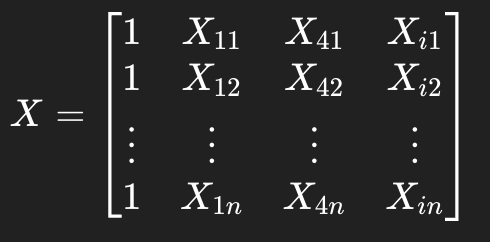

In [23]:
#Pilih peubah yang bersinggung dengan X1 X4
JKR = 0
R_langkah_ketiga = []

for var in ['X2', 'X3']:
  X = np.array([[1, df_model['X1'][i], df_model['X4'][i], df_model[var][i]] for i in range (len(df_model))])
  beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
  g = X.T.dot(Y)
  print(f"Peubah Bebas: {var}, X1, X4")
  print(f"Koefisien Regresi: {beta.flatten()}")

  sum_bj_gj = np.sum(beta*g)
  sum_Yi = np.sum(Y)
  n = len(Y)
  JKR = sum_bj_gj - ((sum_Yi**2) / n)

  R_langkah_ketiga.append(JKR)

df_R_langkah_ketiga = pd.DataFrame(R_langkah_ketiga, index=['X2,X1_X4', 'X3,X1_X4'], columns=['R'])
print()
print(df_R_langkah_ketiga)
print()
print(df_R_langkah_ketiga[df_R_langkah_ketiga['R'] == df_R_langkah_ketiga['R'].max()])

Peubah Bebas: X2, X1, X4
Koefisien Regresi: [-3.81426737e+02  2.40408498e+00  3.21075878e-01  2.55060759e+00]
Peubah Bebas: X3, X1, X4
Koefisien Regresi: [-4.25373428e+02  5.73583844e+00  2.63968808e-01 -1.18526729e-02]

                     R
X2,X1_X4  51748.947414
X3,X1_X4  51747.125459

                     R
X2,X1_X4  51748.947414


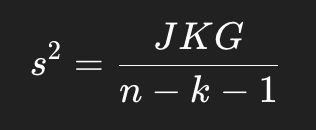

In [24]:
#Cari rataan kuadrat galat (s^2)
JKT = 0
JKR = 0

X = np.array([[1, df_model['X2'][i], df_model['X1'][i], df_model['X4'][i]] for i in range(len(df_model))])
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
g = X.T.dot(Y)

Y_mean = np.mean(Y)
JKT = np.sum((Y - Y_mean)**2)

sum_bj_gj = np.sum(beta*g)
sum_Yi = np.sum(Y)
n = len(Y)
JKR = sum_bj_gj - ((sum_Yi**2) / n)

JKG = JKT - JKR
s_squared_langkah_ketiga = JKG/(len(Y) - 3 - 1)
print("s^2 : ",s_squared_langkah_ketiga)

s^2 :  0.32500318037796205


In [25]:
#Membandingkan dengan nilai f
f_hitung = (JKR-R_langkah_kedua[2])/s_squared_langkah_ketiga
print('f hitung: ', f_hitung)
f_tabel = stats.f.isf(0.05, 1, len(Y) - 3 - 1)

if f_hitung > f_tabel:
  print( 'X2,X1_X4 masuk ke dalam model, karena: ')
  print( 'f hitung(',f_hitung,') >', 'f tabel(',f_tabel,')')
else:
  print('X2,X1_X4 tidak masuk ke dalam model, karena: ')
  print( 'f hitung(',f_hitung,') >', 'f tabel(',f_tabel,')')

f hitung:  6.166154032417753
X2,X1_X4 masuk ke dalam model, karena: 
f hitung( 6.166154032417753 ) > f tabel( 3.940162716990275 )


In [26]:
# uji ulang jika X2 masuk terlebih dahulu dalam model X1_X4,X2
X = np.array([[1, df_model['X2'][i], df_model['X1'][i], df_model['X4'][i]] for i in range(len(df_model))])
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
g = X.T.dot(Y)

sum_bj_gj = np.sum(beta*g)
sum_Yi = np.sum(Y)
n = len(Y)
JKR = sum_bj_gj - ((sum_Yi**2) / n)
print("JKR : ", JKR)

#Membandingkan dengan nilai f
f_hitung = (JKR - (R_langkah_pertama[1]))/s_squared_langkah_ketiga
f_tabel = stats.f.isf(0.05, 1, len(Y) - 3 - 1)

if f_hitung > f_tabel:
  print('X1 dan X4 mash masuk ke dalam model walau X2 terlebih dahulu masuk, karena: ')
  print('f hitung(',f_hitung,') >', 'f tabel(',f_tabel,')')
else:
  print('X1 dan X4 tidak masuk ke dalam model jika X2 terlebih dahulu masuk, karena: ')
  print('f hitung(' ,f_hitung,') <', 'f tabel(',f_tabel, ')')

JKR :  51748.947194683715
X1 dan X4 mash masuk ke dalam model walau X2 terlebih dahulu masuk, karena: 
f hitung( 57.771705519403845 ) > f tabel( 3.940162716990275 )


## **3.4 Langkah Keempat: Mencocokkan satu persamaan regresi terakhir yang mengandung X1, X4 dan X2, yaitu (X3,X1_X4_X2)**

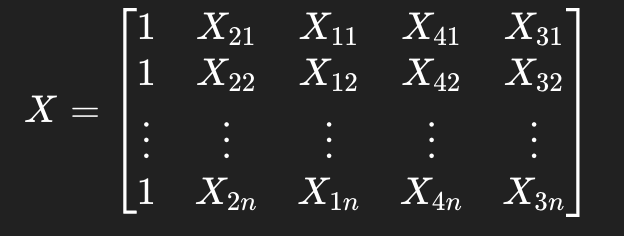

In [27]:
#Pilih peubah yang bersinggung dengan X1, X4, dan X2
R_langkah_keempat=[]

for var in ['X3']:
  X = np.array([[1, df_model['X1'][i], df_model['X4'][i], df_model['X2'][i], df_model[var][i]] for i in range (len(df_model))])
  beta = np. linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
  g = X.T.dot(Y)
  print(f"Peubah Bebas: {var}, X1, X4, X2")
  print(f"Koefisien Regresi: {beta.flatten()}")

  sum_bj_gj = np.sum (beta*g)
  sum_Yi = np.sum(Y)
  n = len(Y)
  JKR = sum_bj_gj - ((sum_Yi**2) / n)

  R_langkah_keempat.append ((JKR))

df_R_langkah_keempat = pd.DataFrame(R_langkah_keempat, index=['X3,X1_X4_X2'], columns=[ 'R'])
print()
print(df_R_langkah_keempat)

Peubah Bebas: X3, X1, X4, X2
Koefisien Regresi: [-4.10554718e+02  2.81240435e+00  3.69848768e-01  2.76818306e+00
 -1.92708272e-02]

                       R
X3,X1_X4_X2  51749.41448


In [28]:
#Cari rataan kuadrat galat (s^2)
JKT = 0
JKR = 0

X = np.array([[1, df_model['X3'][i], df_model['X1'][i], df_model['X4'][i], df_model['X2'][i]] for i in range(len(df_model))])
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
g = X.T.dot(Y)

Y_mean = np.mean(Y)
JKT = np.sum((Y - Y_mean) **2)

sum_bj_gj = np.sum(beta*g)
sum_Yi = np.sum(Y)
n = len(Y)
JKR = sum_bj_gj - ((sum_Yi**2) / n)

JKG = JKT - JKR
s_squared_langkah_keempat = JKG/(len(Y) - 4 - 1)
print("s^2 : ",s_squared_langkah_keempat)

s^2 :  0.3235087535494945


In [29]:
#Membandingkan dengan nilai f
f_hitung = (JKR - (R_langkah_ketiga[0]))/s_squared_langkah_keempat
print('f hitung: ', f_hitung)
f_tabel = stats.f.isf(0.05, 1, len (Y) - 4 - 1)

if f_hitung > f_tabel:
  print('X3,X1_X4_X2 masuk ke dalam model, karena: ')
  print('f hitung(',f_hitung,') >', 'f tabel(',f_tabel, ')')
else:
  print('X3,X1_X4_X2 tidak masuk ke dalam model, karena: ')
  print('f hitung(',f_hitung,') < ' 'f tabel(',f_tabel,')')

f hitung:  1.442787505677415
X3,X1_X4_X2 tidak masuk ke dalam model, karena: 
f hitung( 1.442787505677415 ) < f tabel( 3.9412215469195906 )


$$
Y = b_0 + b_1 X_1 + b_2 X_4 + b_3 X_2
$$

In [30]:
#Cari nilai beta
X = np.array([[1, df_model['X1'][i], df_model['X4'][i], df_model['X2'][i]] for i in range (len(df_model))])
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
hasil_akhir_beta = pd.DataFrame(beta, index=['b0', 'b1', 'b2', 'b3'], columns=['Koef'])
hasil_akhir_beta

,Koef
b0,-381.426737
b1,2.404085
b2,0.321076
b3,2.550608


# **Model Akhir**

$$
Y = -381.426737 + 2.404085 \cdot X_1 + 0.321076 \cdot X_4 + 2.550608 \cdot X_2
$$

In [31]:
#Hitung galat
g = X.T.dot(Y)

#Hitung JKT
Y_mean = np.mean (Y)
JKT = np.sum((Y - Y_mean) **2)

#Hitung JKR
sum_bj_gj = np.sum(beta*g)
sum_Yi = np.sum(Y)
n = len (Y)
JKR = sum_bj_gj - ((sum_Yi**2) / n)
print("JKR model akhir :",JKR)

JKR model akhir : 51748.9474140252


In [32]:
# Hitung Koef Determinasi
R_squared = JKR / JKT
print("Koef Determinasi :",R_squared)

Koef Determinasi : 0.999397450809216


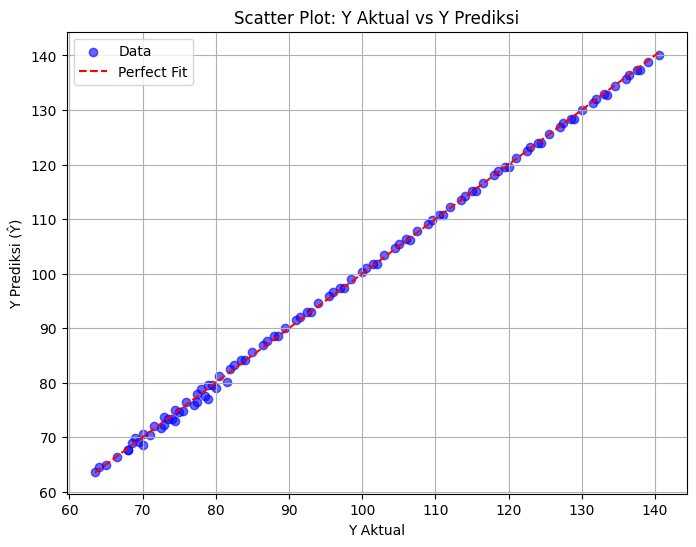

In [33]:
Y_hat = X.dot(beta)

plt.figure(figsize=(8,6))
plt.scatter(Y, Y_hat, color='blue', alpha=0.6, label='Data')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='--', label='Perfect Fit')  # garis referensi
plt.xlabel('Y Aktual')
plt.ylabel('Y Prediksi (Ŷ)')
plt.title('Scatter Plot: Y Aktual vs Y Prediksi')
plt.legend()
plt.grid(True)
plt.show()